In [2]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_pickle('df.pkl')

In [ ]:
df.to_pickle('df.pkl')

In [ ]:
# Remove the rows, where the value count is less than 1000
vc = df.Census_InternalBatteryType.value_counts()
u  = [i not in set(vc[vc<1000].index) for i in df['Census_InternalBatteryType']]
df = df[u]
print(df.Census_InternalBatteryType.value_counts())

In [58]:
df.drop(df[df.SmartScreen == '&#x01;'].index, inplace=True)
df.drop(df[df.SmartScreen == '&#x02;'].index, inplace=True)
df.drop(df[df.SmartScreen == '&#x03;'].index, inplace=True)
df.drop(df[df.SmartScreen == '0'].index, inplace=True)
df.drop(df[df.SmartScreen == '00000000'].index, inplace=True)
df.drop(df[df.SmartScreen == 'Enabled'].index, inplace=True)
print(df['SmartScreen'].unique())
df.SmartScreen.value_counts()

[nan 'RequireAdmin' 'ExistsNotSet' 'Off' 'Warn' 'Prompt' 'Block' 'On']


RequireAdmin    4316194
ExistsNotSet    1046183
Off              187907
Warn             135484
Prompt            34536
Block             22533
On                  878
Name: SmartScreen, dtype: int64

In [56]:
print(df['SmartScreen'].unique())
df.SmartScreen.value_counts()

[nan 'RequireAdmin' 'ExistsNotSet' 'Off' 'Warn' 'Prompt' 'Block' 'On'
 '&#x01;' '&#x02;' '0' 'Enabled' '00000000' '&#x03;']


RequireAdmin    4316194
ExistsNotSet    1046183
Off              187907
Warn             135484
Prompt            34536
Block             22533
On                  878
&#x02;              416
&#x01;              335
0                     3
00000000              1
&#x03;                1
Enabled               1
Name: SmartScreen, dtype: int64

<class 'pandas.core.series.Series'>
Census_InternalBatteryType                           0.710463
Census_ThresholdOptIn                                0.635241
Census_IsWIMBootEnabled                              0.634387
SmartScreen                                          0.356138
OrganizationIdentifier                               0.308419
SMode                                                0.060279
CityIdentifier                                       0.036476
Wdft_IsGamer                                         0.034013
Wdft_RegionIdentifier                                0.034013
Census_InternalBatteryNumberOfCharges                0.030125
Census_FirmwareManufacturerIdentifier                0.020541
Census_IsFlightsDisabled                             0.017993
Census_FirmwareVersionIdentifier                     0.017949
Census_OEMModelIdentifier                            0.011459
Census_OEMNameIdentifier                             0.010702
Firewall                          

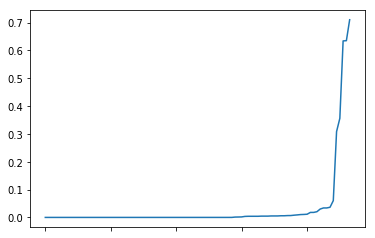

In [59]:
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [43]:
for f in drop_list:
    print('Dropping: ' + col)
    df = df.drop(f, 1)

In [40]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

Dropping: EngineVersion_0
Dropping: EngineVersion_1
Dropping: AppVersion_0
Dropping: AvSigVersion_3


In [39]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
# start_cnt += show_cnt

In [38]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_OSVersion_0 object
['10' '6']
Census_OSVersion_1 object
['0' '3' '1' '2']
Census_OSVersion_2 object
['17134' '14393' '16299' '10586' '10240' '15063' '17744' '17692' '17738'
 '17751' '17713' '17755' '17741' '17733' '17746' '17735' '17754' '17758'
 '17740' '17672' '17763' '17666' '17677' '17686' '17747' '14314' '17760'
 '17133' '17759' '17682' '17761' '17661' '17643' '18234' '18242' '17639'
 '17634' '14986' '18237' '17704' '16275' '17650' '15031' '14390' '17723'
 '14257' '14295' '16179' '14385' '17711' '15042' '17004' '7601' '17728'
 '14342' '15002' '18240' '14316' '17627' '14366' '14946' '14352' '17730'
 '14905' '15019' '16251' '14372' '9600' '17655' '15055' '17017' '14291'
 '9200' '18219' '14971' '17742' '16232' '15025' '18204' '14379' '17063'
 '17035' '14389' '14361' '10565' '14931' '15048' '16294' '11099' '14936'
 '18214' '17074' '17623' '14271' '14926' '17025' '16176' '17604' '16241'
 '17618' '17128' '14901' '16278' '16199' '14915' '17127' '14332' '10576'
 '16193' '11082' '14

In [37]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

OsBuildLab_1 object
['1' '0' '431' '18409' '15' '19067' '17914' '576' '545' '19125' '1593'
 '2189' '19000' '420' '589' '16384' '402' '306' '17443' '1176' '321'
 '16393' '18969' '447' '103' '122' '1066' '18589' '1715' '19101' '2007'
 '1914' '162' '2214' '18289' '17946' '23418' '17354' '494' '24214' '2068'
 '637' '16412' '17113' '24168' '16590' '351' '1944' '1770' '1794' '839'
 '2395' '2035' '18505' '1198' '693' '1358' '23915' '2430' '11' '1106' '82'
 '18798' '63' '19035' '962' '1001' '672' '633' '18821' '187' '24093'
 '1045' '17' '1480' '2125' '24150' '18895' '1004' '212' '953' '916'
 '24231' '2248' '3' '2097' '2485' '23807' '18247' '18946' '1000' '24024'
 '17319' '1007' '16644' '16463' '23864' '2457' '17184' '17889' '24094'
 '16841' '17861' '17071' '17202' '18292' '23539' '23796' '24000' '2273'
 '223' '18931' '206' '2363' '19160' '23569' '23572' '2368' '17976' '23564'
 '338' '24117' '17630' '17709' '19045' '18264' '17795' '726' '17022'
 '23677' '18790' '2515' '1003' '18685' '479' '2388

In [36]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

OsVer_0 object
['10' '6']
OsVer_1 object
['0' '1' '3']
OsVer_2 object
['0' '1' '3' '32' '2' '5' '21' '4' '80' '7' '19' '16' '48' '153' '8' '23'
 '6']
OsVer_3 object
['0' '44' '72' '18' '1' '80' '86' '36' '112' '117' '144' '101' '128' '96'
 '22' '153' '16' '3' '2']
OsBuildLab_0 object
['17134' '14393' '16299' '7601' '9600' '10240' '15063' '10586' '17744'
 '17692' '17738' '17751' '17755' '17730' '17733' '17746' '17735' '17754'
 '17741' '17713' '17740' '17672' '17758' '17763' '7600' '17666' '17677'
 '17686' '17747' '14314' '17760' '17759' '17682' '17761' '17704' '17661'
 '17643' '18234' '17618' '18204' '17639' nan '17634' '17728' '18237'
 '18242' '17133' '17723' '17650' '17711' '18219' '18240' '17627' '17655'
 '18214' '14389' '18201' '17604' '14439' '14298' '18224' '18241' '17689'
 '17718' '17753' '14230' '14453' '18227' '18238' '14425' '17725' '17694'
 '14306' '17757' '18233' '14474' '14206' '17623' '17756' '14379' '17749'
 '17734' '17752' '18064' '18226' '18230' '18244' '18236' '14466' 

In [35]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

AppVersion_3 object
['18075' '1' '0' '18062' '2' '17914' '228' '15' '18041' '494' '1593' '589'
 '16384' '18052' '447' '17443' '1106' '18022' '18039' '1155' '1794'
 '17946' '18011' '17354' '1066' '191' '17113' '873' '1198' '839' '962'
 '672' '1613' '1045' '112' '17123' '916' '2273' '17319' '965' '17184'
 '17889' '953' '17861' '17071' '17202' '18072' '319' '18038' '17609'
 '20021' '1000' '17533' '2248' '17146' '17394' '17797' '1532' '17918'
 '2457' '18051' '17770' '456' '20015' '1001' '20063' '1003' '726' '17446'
 '1177' '994' '20082' '20033' '18021' '17121' '18070' '1154' '16425'
 '1004' '226' '17943']
AvSigVersion_0 object
['1' '0']
AvSigVersion_1 object
['273' '263' '275' '277' '237' '267' '271' '251' '245' '257' '269' '235'
 '259' '253' '233' '241' '227' '261' '265' '249' '239' '247' '221' '231'
 '225' '255' '243' '229' '223' '199' '213' '0' '201' '169' '217' '219'
 '205' '207' '167' '193' '211' '209' '203' '215' '195' '155' '197' '189'
 '187' '2&#x17;3' '177']
AvSigVersion_2 object


In [34]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

EngineVersion_2 object
['15100' '14600' '15200' '15300' '13504' '14800' '15000' '14104' '13804'
 '14306' '13407' '14405' '14901' '14700' '14202' '13303' '13701' '13000'
 '14500' '14003' '13601' '13903' '12805' '13202' '12902' '14305' '13704'
 '14002' '14103' '13103' '14303' '14201' '13102' '11701' '12400' '14001'
 '11804' '10401' '13902' '14102' '12603' '12706' '12002' '13803' '12101'
 '13406' '13802' '10302' '11400' '12804' '12300' '12205' '11903' '12505'
 '11502' '9700' '11602' '13503' '13301' '11202' '11104' '12802' '10701']
EngineVersion_3 object
['1' '4' '6' '0' '3' '2' '5']
AppVersion_0 object
['4']
AppVersion_1 object
['18' '13' '9' '10' '8' '12' '14' '11' '16' '6' '4' '7' '17' '5' '15']
AppVersion_2 object
['1807' '17134' '218' '1806' '1809' '209' '10240' '16299' '17639' '10586'
 '14393' '15063' '17656' '17007' '17613' '207' '204' '205' '305' '304'
 '17677' '17661' '17643' '216' '17686' '17672' '17666' '17682' '17650'
 '306' '17685' '17634' '17655' '17627' '219' '203' '212' '17

In [33]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Wdft_IsGamer float64
[ 0.  1. nan]
Wdft_RegionIdentifier float64
[10.  8.  3.  1. 15.  7. 11.  2. 12.  4. 13. nan  6.  9.  5. 14.]
HasDetections int64
[0 1]
EngineVersion_0 object
['1']
EngineVersion_1 object
['1']


In [32]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_IsWIMBootEnabled float64
[nan  0.  1.]
Census_IsVirtualDevice float64
[ 0. nan  1.]
Census_IsTouchEnabled int64
[0 1]
Census_IsPenCapable int64
[0 1]
Census_IsAlwaysOnAlwaysConnectedCapable float64
[ 0.  1. nan]


In [31]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_FlightRing object
['Retail' 'NOT_SET' 'Unknown' 'Disabled' 'RP' 'WIS' 'WIF' 'OSG' 'Canary'
 'Invalid']
Census_ThresholdOptIn float64
[nan  0.  1.]
Census_FirmwareManufacturerIdentifier float64
[ 628.  142.  355.   93.  556.  512.  500.  845.  486.  803.  152.  644.
   nan  897.  168.  554.  559.  677.  444.  134.  127.  513.  691.  798.
  809.  807.  639.  361.  440.  491.  781.  777.  789.  869.  659.  360.
  302.  299.  465.  820.  105.  805.  150.  279.  106.  892.  687.  839.
  529.  827.  298.  190.  831.  653. 1080.  369.  876.  446.  196.  560.
  205.  442.  311.  633.  998.  520.  717. 1075.  658.  819.  901.  347.
 1030. 1079.  830. 1081.  718. 1069.  359.  651.  350.  679.  545.  661.
  696.  821.  991.  538.  107.  708.  902.  182.  310.  422.  664.  338.
   17.  445.  888.  642.  203. 1014.  301.  354.  488.  461. 1040.  699.
  853.  523.  109.  584.  108.  601.  981.  371.  460.  508.  130.  357.
  671.  353.  665.  243.  828.  522.  276.  539.  685.  118.  540. 101

In [30]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_IsPortableOperatingSystem int64
[0 1]
Census_GenuineStateName object
['IS_GENUINE' 'OFFLINE' 'INVALID_LICENSE' 'UNKNOWN' 'TAMPERED']
Census_ActivationChannel object
['Retail' 'OEM:NONSLP' 'OEM:DM' 'Volume:GVLK' 'Volume:MAK'
 'Retail:TB:Eval']
Census_IsFlightingInternal float64
[nan  0.  1.]
Census_IsFlightsDisabled float64
[ 0. nan  1.]


In [29]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_OSSkuName object
['PROFESSIONAL' 'CORE' 'CORE_SINGLELANGUAGE' 'ENTERPRISE_S'
 'CORE_COUNTRYSPECIFIC' 'ENTERPRISE_S_N' 'ENTERPRISE' 'EDUCATION' 'CLOUD'
 'PROFESSIONAL_N' 'STANDARD_SERVER' 'CORE_N' 'STANDARD_EVALUATION_SERVER'
 'EDUCATION_N' 'DATACENTER_EVALUATION_SERVER' 'SB_SOLUTION_SERVER'
 'ENTERPRISE_N' 'PRO_WORKSTATION_N' 'PRO_WORKSTATION' 'UNLICENSED'
 'ULTIMATE' 'CLOUDN' 'PRO_CHINA' 'SERVERRDSH' 'DATACENTER_SERVER'
 'ENTERPRISEG' 'STARTER' 'PRO_FOR_EDUCATION' 'PRO_SINGLE_LANGUAGE'
 'UNDEFINED']
Census_OSInstallTypeName object
['UUPUpgrade' 'IBSClean' 'Update' 'Upgrade' 'Other' 'Clean' 'Reset'
 'Refresh' 'CleanPCRefresh']
Census_OSInstallLanguageIdentifier float64
[26.  8.  7. 17. 18. 14. 27.  6. 29. 37. 39. 10. 35.  9. 20. 25. nan  1.
  4.  5. 24. 31. 30. 19. 15.  3.  2. 16. 33. 23. 36. 22. 12. 13. 32. 21.
 38. 28. 34. 11.]
Census_OSUILocaleIdentifier int64
[119  31  30  64  72  49 120  28 125 158 160  35 148  34  83 115   5  24
 156  26 109 130 128  74  58  20  11  62 140

In [28]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

Census_OSArchitecture object
['amd64' 'arm64' 'x86']
Census_OSBranch object
['rs4_release' 'rs1_release' 'rs3_release_svc_escrow' 'th2_release'
 'rs3_release' 'th1_st1' 'rs2_release' 'th1' 'rs3_release_svc_escrow_im'
 'th2_release_sec' 'rs5_release' 'rs_prerelease_flt' 'rs_prerelease'
 'rs5_release_sigma' 'rs5_release_edge' 'rs5_release_sigma_dev'
 'winblue_ltsb_escrow' 'win7sp1_ldr' 'rs1_release_srvmedia' 'win8_gdr'
 'rs1_release_sec' 'rs3_release_svc' 'Khmer OS' 'winblue_ltsb' 'rs_shell'
 'rs_onecore_stack_per1' 'win7sp1_ldr_escrow' 'rs_onecore_base_cobalt'
 'rs1_release_svc' 'rs_xbox' 'rs5_release_sign' 'win8_ldr']
Census_OSBuildNumber int64
[17134 14393 16299 10586 10240 15063 17744 17692 17738 17751 17713 17755
 17741 17733 17746 17735 17754 17758 17740 17672 17763 17666 17677 17686
 17747 14314 17760 17133 17759 17682 17761 17661 17643 18234 18242 17639
 17634 14986 18237 17704 16275 17650 15031 14390 17723 14257 14295 16179
 14385 17711 15042 17004  7601 17728 14342 15002 18240 

In [27]:
df['Census_OSVersion_0'] = df['Census_OSVersion'].apply(break_and_get_part, position=0)
df['Census_OSVersion_1'] = df['Census_OSVersion'].apply(break_and_get_part, position=1)
df['Census_OSVersion_2'] = df['Census_OSVersion'].apply(break_and_get_part, position=2)
df['Census_OSVersion_3'] = df['Census_OSVersion'].apply(break_and_get_part, position=3)

drop_list.append('Census_OSVersion')

print(df['Census_OSVersion_0'].unique())
print(df['Census_OSVersion_1'].unique())
print(df['Census_OSVersion_2'].unique())
print(df['Census_OSVersion_3'].unique())

['10' '6']
['0' '3' '1' '2']
['17134' '14393' '16299' '10586' '10240' '15063' '17744' '17692' '17738'
 '17751' '17713' '17755' '17741' '17733' '17746' '17735' '17754' '17758'
 '17740' '17672' '17763' '17666' '17677' '17686' '17747' '14314' '17760'
 '17133' '17759' '17682' '17761' '17661' '17643' '18234' '18242' '17639'
 '17634' '14986' '18237' '17704' '16275' '17650' '15031' '14390' '17723'
 '14257' '14295' '16179' '14385' '17711' '15042' '17004' '7601' '17728'
 '14342' '15002' '18240' '14316' '17627' '14366' '14946' '14352' '17730'
 '14905' '15019' '16251' '14372' '9600' '17655' '15055' '17017' '14291'
 '9200' '18219' '14971' '17742' '16232' '15025' '18204' '14379' '17063'
 '17035' '14389' '14361' '10565' '14931' '15048' '16294' '11099' '14936'
 '18214' '17074' '17623' '14271' '14926' '17025' '16176' '17604' '16241'
 '17618' '17128' '14901' '16278' '16199' '14915' '17127' '14332' '10576'
 '16193' '11082' '14298' '18224' '18241' '17689' '17753' '16281' '17093'
 '16288' '14230' '16215' 

In [26]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   Census_InternalPrimaryDisplayResolutionVertical  \
0                                            900.0   
1                                            768.0   
2                                           1080.0   
3                                            768.0   
4                                            768.0   

  Census_PowerPlatformRoleName Census_InternalBatteryType  \
0                      Desktop                        NaN   
1                       Mobile                        NaN   
2                      Desktop                        NaN   
3                      Desktop                        NaN   
4                       Mobile                       lion   

   Census_InternalBatteryNumberOfCharges Census_OSVersion  
0                           4.294967e+09   10.0.17134.165  
1                           1.000000e+00     10.0.17134.1  
2                           4.294967e+09   10.0.17134.165  
3                           4.294967e+09   10.0.17134.228  
4       

In [25]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   Census_HasOpticalDiskDrive  Census_TotalPhysicalRAM Census_ChassisTypeName  \
0                           0                   4096.0                Desktop   
1                           0                   4096.0               Notebook   
2                           0                   4096.0                Desktop   
3                           0                   4096.0              MiniTower   
4                           0                   6144.0               Portable   

   Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                                               18.9   
1                                               13.9   
2                                               21.5   
3                                               18.5   
4                                               14.0   

   Census_InternalPrimaryDisplayResolutionHorizontal  
0                                             1440.0  
1                                             1366.0  
2          

In [24]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   Census_ProcessorModelIdentifier Census_ProcessorClass  \
0                           2341.0                   NaN   
1                           2405.0                   NaN   
2                           1972.0                   NaN   
3                           2273.0                   NaN   
4                           2500.0                   NaN   

   Census_PrimaryDiskTotalCapacity Census_PrimaryDiskTypeName  \
0                         476940.0                        HDD   
1                         476940.0                        HDD   
2                         114473.0                        SSD   
3                         238475.0                    UNKNOWN   
4                         476940.0                        HDD   

   Census_SystemVolumeTotalCapacity  
0                          299451.0  
1                          102385.0  
2                          113907.0  
3                          227116.0  
4                          101900.0  
Census_ProcessorMode

In [23]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

  Census_DeviceFamily  Census_OEMNameIdentifier  Census_OEMModelIdentifier  \
0     Windows.Desktop                    2668.0                     9124.0   
1     Windows.Desktop                    2668.0                    91656.0   
2     Windows.Desktop                    4909.0                   317701.0   
3     Windows.Desktop                    1443.0                   275890.0   
4     Windows.Desktop                    1443.0                   331929.0   

   Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  
0                        4.0                                     5.0  
1                        4.0                                     5.0  
2                        4.0                                     5.0  
3                        4.0                                     5.0  
4                        4.0                                     5.0  
Census_DeviceFamily object
['Windows.Desktop' 'Windows.Server' 'Windows']
Census_OEMNameIdentifier float6

In [22]:
df.loc[df.SmartScreen == 'off', 'SmartScreen'] = "Off"
df.loc[df.SmartScreen == 'on', 'SmartScreen'] = "On"
df.loc[df.SmartScreen == 'OFF', 'SmartScreen'] = "Off"
df.loc[df.SmartScreen == 'requireAdmin', 'SmartScreen'] = "RequireAdmin"
df.loc[df.SmartScreen == 'Promt', 'SmartScreen'] = "Prompt"
df.loc[df.SmartScreen == 'prompt', 'SmartScreen'] = "Prompt"
df.loc[df.SmartScreen == 'warn', 'SmartScreen'] = "Warn"
df.loc[df.SmartScreen == 'requireadmin', 'SmartScreen'] = "RequireAdmin"
print(df['SmartScreen'].unique())

[nan 'RequireAdmin' 'ExistsNotSet' 'Off' 'Warn' 'Prompt' 'Block' 'On'
 '&#x01;' '&#x02;' '0' 'Enabled' '00000000' '&#x03;']


In [21]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   IeVerIdentifier   SmartScreen  Firewall  UacLuaenable Census_MDC2FormFactor
0            137.0           NaN       1.0           1.0               Desktop
1            137.0           NaN       1.0           1.0              Notebook
2            137.0  RequireAdmin       1.0           1.0               Desktop
3            137.0  ExistsNotSet       1.0           1.0               Desktop
4            137.0  RequireAdmin       1.0           1.0              Notebook
IeVerIdentifier float64
[137.  94.  nan 290. 117. 111. 333.  65. 108.  82. 103.  98. 323.  78.
 105.  84. 135.  41.  76.  53. 107.  74. 302.  96.  68. 114. 311.  51.
  71.  81. 335.  42.  46. 308. 334.  44.  90. 325.  88. 295.  92. 185.
  87.  85. 327.  73.  86. 163.  91. 309. 337. 336. 317. 180. 190. 324.
  50.  72. 321.  48.  64. 196. 331.  63.  45.  49. 318. 312. 326. 174.
 176. 305. 287. 315. 186. 313. 194.  77. 169. 181. 332. 288. 153. 199.
  58.  39. 205. 328. 300. 347. 307. 102. 152. 275. 303. 319. 322. 384.
 294.

In [20]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

  SkuEdition  IsProtected  AutoSampleOptIn PuaMode  SMode
0        Pro          1.0                0     NaN    0.0
1        Pro          1.0                0     NaN    0.0
2       Home          1.0                0     NaN    0.0
3        Pro          1.0                0     NaN    0.0
4       Home          1.0                0     NaN    0.0
SkuEdition object
['Pro' 'Home' 'Invalid' 'Enterprise LTSB' 'Enterprise' 'Education' 'Cloud'
 'Server']
IsProtected float64
[ 1.  0. nan]
AutoSampleOptIn int64
[0 1]
PuaMode object
[nan 'on' 'audit']
SMode float64
[ 0. nan  1.]


In [19]:
# print(df['OsBuildLab'].dtype)
# print(df['OsBuildLab'].unique())
df['OsBuildLab_0'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=0)
df['OsBuildLab_1'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=1)
df['OsBuildLab_2'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=2)
df['OsBuildLab_3'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=3)
df['OsBuildLab_4'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=4)
df['OsBuildLab_5'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=5)
drop_list.append('OsBuildLab')
print(df['OsBuildLab_0'].unique())
print(df['OsBuildLab_1'].unique())
print(df['OsBuildLab_2'].unique())
print(df['OsBuildLab_3'].unique())
print(df['OsBuildLab_4'].unique())
print(df['OsBuildLab_5'].unique())

['17134' '14393' '16299' '7601' '9600' '10240' '15063' '10586' '17744'
 '17692' '17738' '17751' '17755' '17730' '17733' '17746' '17735' '17754'
 '17741' '17713' '17740' '17672' '17758' '17763' '7600' '17666' '17677'
 '17686' '17747' '14314' '17760' '17759' '17682' '17761' '17704' '17661'
 '17643' '18234' '17618' '18204' '17639' nan '17634' '17728' '18237'
 '18242' '17133' '17723' '17650' '17711' '18219' '18240' '17627' '17655'
 '18214' '14389' '18201' '17604' '14439' '14298' '18224' '18241' '17689'
 '17718' '17753' '14230' '14453' '18227' '18238' '14425' '17725' '17694'
 '14306' '17757' '18233' '14474' '14206' '17623' '17756' '14379' '17749'
 '17734' '17752' '18064' '18226' '18230' '18244' '18236' '14466' '17750']
['1' '0' '431' '18409' '15' '19067' '17914' '576' '545' '19125' '1593'
 '2189' '19000' '420' '589' '16384' '402' '306' '17443' '1176' '321'
 '16393' '18969' '447' '103' '122' '1066' '18589' '1715' '19101' '2007'
 '1914' '162' '2214' '18289' '17946' '23418' '17354' '494' '2421

In [18]:
import math
def break_and_get_part_osbuildlab(value, position):
    if position < 4:
        try:
            return value.split(".")[position]
        except:
            return math.nan
    elif position == 4:
        try:
            return value.split(".")[4].split('-')[0]
        except:
            return math.nan
    elif position == 5:
        try:
            return value.split(".")[4].split('-')[1]
        except:
            return math.nan

In [17]:
df['OsVer_0'] = df['OsVer'].apply(break_and_get_part, position=0)
df['OsVer_1'] = df['OsVer'].apply(break_and_get_part, position=1)
df['OsVer_2'] = df['OsVer'].apply(break_and_get_part, position=2)
df['OsVer_3'] = df['OsVer'].apply(break_and_get_part, position=3)
drop_list.append('OsVer')
print(df['OsVer_0'].unique())
print(df['OsVer_1'].unique())
print(df['OsVer_2'].unique())
print(df['OsVer_3'].unique())

['10' '6']
['0' '1' '3']
['0' '1' '3' '32' '2' '5' '21' '4' '80' '7' '19' '16' '48' '153' '8' '23'
 '6']
['0' '44' '72' '18' '1' '80' '86' '36' '112' '117' '144' '101' '128' '96'
 '22' '153' '16' '3' '2']


In [16]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

      OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  10.0.0.0    17134      256                  rs4   
1  10.0.0.0    17134      256                  rs4   
2  10.0.0.0    17134      768                  rs4   
3  10.0.0.0    17134      256                  rs4   
4  10.0.0.0    17134      768                  rs4   

                                 OsBuildLab  
0  17134.1.amd64fre.rs4_release.180410-1804  
1  17134.1.amd64fre.rs4_release.180410-1804  
2  17134.1.amd64fre.rs4_release.180410-1804  
3  17134.1.amd64fre.rs4_release.180410-1804  
4  17134.1.amd64fre.rs4_release.180410-1804  
OsVer object
['10.0.0.0' '6.1.1.0' '6.3.0.0' '10.0.1.44' '6.1.0.0' '6.3.1.0' '6.1.3.0'
 '10.0.3.0' '10.0.1.0' '10.0.32.72' '10.0.2.0' '10.0.5.18' '10.0.0.1'
 '10.0.21.0' '6.3.3.0' '10.0.4.0' '10.0.80.0' '10.0.7.0' '10.0.5.0'
 '6.3.4.0' '10.0.32.0' '10.0.3.80' '10.0.2.86' '10.0.19.80' '10.0.16.36'
 '6.1.0.112' '10.0.5.117' '10.0.48.0' '6.3.16.0' '10.0.16.0' '10.0.1.144'
 '10.0.7.101' '6.1.7.0' '6.

In [15]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor  
0  windows10       x64  
1  windows10       x64  
2  windows10       x64  
3  windows10       x64  
4  windows10       x64  
OrganizationIdentifier float64
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
GeoNameIdentifier float64
[ 35. 119.  64. 117. 277. 126.  89. 205. 138. 101. 211. 209. 199. 230.
 202.  53. 187.  15. 255. 274. 266.  10. 276. 267. 240.

In [14]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   

   CityIdentifier  
0        128035.0  
1          1482.0  
2        153579.0  
3         20710.0  
4         37376.0  
AVProductsInstalled float64
[ 1.  2.  3.  5. nan  4.  6.  7.  0.]
AVProductsEnabled float64
[ 1.  2.  0.  4. nan  3.  5.]
HasTpm int64
[1 0]
CountryIdentifier int64
[ 29  93  86  88  18  97  78 164 107  80 171 169 157 178 158  43 147  12
 203 205 199   9  68 201 141  35 159 160 129  44 207  15  89   3 108  55
 195 214 148 100  16 155 190  95  53 204  94   8 152 110 184 132 122  57
  39  51  59  70  52 121 149 142  41   2 179 180  27 103 167 10

In [13]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   IsBeta  RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0       0               7.0                 0                        NaN   
1       0               7.0                 0                        NaN   
2       0               7.0                 0                        NaN   
3       0               7.0                 0                        NaN   
4       0               7.0                 0                        NaN   

   AVProductStatesIdentifier  
0                    53447.0  
1                    53447.0  
2                    53447.0  
3                    53447.0  
4                    53447.0  
IsBeta int64
[0 1]
RtpStateBitfield float64
[ 7.  0. nan  3.  5.  8.  1. 35.]
IsSxsPassiveMode int64
[0 1]
DefaultBrowsersIdentifier float64
[  nan 1950.  146. ... 2327.  976. 1149.]
AVProductStatesIdentifier float64
[53447. 43927. 46413. ... 16684. 60602. 31745.]


In [12]:
print(df['EngineVersion_0'].unique())
print(df['EngineVersion_1'].unique())
print(df['EngineVersion_2'].unique())
print(df['EngineVersion_3'].unique())
print(df['AppVersion_0'].unique())
print(df['AppVersion_1'].unique())
print(df['AppVersion_2'].unique())
print(df['AppVersion_3'].unique())
print(df['AvSigVersion_0'].unique())
print(df['AvSigVersion_1'].unique())
print(df['AvSigVersion_2'].unique())
print(df['AvSigVersion_3'].unique())

['1']
['1']
['15100' '14600' '15200' '15300' '13504' '14800' '15000' '14104' '13804'
 '14306' '13407' '14405' '14901' '14700' '14202' '13303' '13701' '13000'
 '14500' '14003' '13601' '13903' '12805' '13202' '12902' '14305' '13704'
 '14002' '14103' '13103' '14303' '14201' '13102' '11701' '12400' '14001'
 '11804' '10401' '13902' '14102' '12603' '12706' '12002' '13803' '12101'
 '13406' '13802' '10302' '11400' '12804' '12300' '12205' '11903' '12505'
 '11502' '9700' '11602' '13503' '13301' '11202' '11104' '12802' '10701']
['1' '4' '6' '0' '3' '2' '5']
['4']
['18' '13' '9' '10' '8' '12' '14' '11' '16' '6' '4' '7' '17' '5' '15']
['1807' '17134' '218' '1806' '1809' '209' '10240' '16299' '17639' '10586'
 '14393' '15063' '17656' '17007' '17613' '207' '204' '205' '305' '304'
 '17677' '17661' '17643' '216' '17686' '17672' '17666' '17682' '17650'
 '306' '17685' '17634' '17655' '17627' '219' '203' '212' '17618' '17604']
['18075' '1' '0' '18062' '2' '17914' '228' '15' '18041' '494' '1593' '589'
 '163

In [11]:
df['EngineVersion_0'] = df['EngineVersion'].apply(break_and_get_part, position=0)
df['EngineVersion_1'] = df['EngineVersion'].apply(break_and_get_part, position=1)
df['EngineVersion_2'] = df['EngineVersion'].apply(break_and_get_part, position=2)
df['EngineVersion_3'] = df['EngineVersion'].apply(break_and_get_part, position=3)

df['AppVersion_0'] = df['AppVersion'].apply(break_and_get_part, position=0)
df['AppVersion_1'] = df['AppVersion'].apply(break_and_get_part, position=1)
df['AppVersion_2'] = df['AppVersion'].apply(break_and_get_part, position=2)
df['AppVersion_3'] = df['AppVersion'].apply(break_and_get_part, position=3)

df['AvSigVersion_0'] = df['AvSigVersion'].apply(break_and_get_part, position=0)
df['AvSigVersion_1'] = df['AvSigVersion'].apply(break_and_get_part, position=1)
df['AvSigVersion_2'] = df['AvSigVersion'].apply(break_and_get_part, position=2)
df['AvSigVersion_3'] = df['AvSigVersion'].apply(break_and_get_part, position=3)

drop_list.append('EngineVersion')
drop_list.append('AppVersion')
drop_list.append('AvSigVersion')

In [10]:
def break_and_get_part(value, position):
    return value.split(".")[position]

In [9]:
# Now analyze one column at a time
start_cnt = 0
show_cnt = 5
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
    print(y, df[y].dtype)
start_cnt += show_cnt

                  MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  
0  4.18.1807.18075  1.273.1735.0  
1     4.13.17134.1    1.263.48.0  
2  4.18.1807.18075  1.273.1341.0  
3  4.18.1807.18075  1.273.1527.0  
4  4.18.1807.18075  1.273.1379.0  
MachineIdentifier object
ProductName object
EngineVersion object
AppVersion object
AvSigVersion object


In [8]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

In [7]:
# Drop MachineIdentifier
drop_list.append('MachineIdentifier')

In [6]:
drop_list = []

import operator 
# Find all the NaN
# See what percentage of each column is NaN
x_pct = {}
length = len(df)
for y in df.columns:
    if df[y].isnull().sum() > 0:
        x_cnt = df[y].isnull().sum()
        x_pct[y] = 100.0*x_cnt/length
        
x_pct_list = sorted(x_pct.items(), key=operator.itemgetter(1), reverse=True)
      
# Print the features, where more than 80% of the data is NaN    
for f, val in x_pct_list:
    if val > 80:
        print(f, val)
        drop_list.append(f)
        print('Dropping: ' + f)
        print('------')

PuaMode 99.97411865269486
Dropping: PuaMode
------
Census_ProcessorClass 99.58940682843873
Dropping: Census_ProcessorClass
------
DefaultBrowsersIdentifier 95.14163732644
Dropping: DefaultBrowsersIdentifier
------
Census_IsFlightingInternal 83.04402978742435
Dropping: Census_IsFlightingInternal
------


In [5]:
pd.set_option('max_colwidth',1000)

<class 'pandas.core.series.Series'>
MachineIdentifier                                    0.000000
Census_MDC2FormFactor                                0.000000
Census_DeviceFamily                                  0.000000
Census_HasOpticalDiskDrive                           0.000000
Census_OSVersion                                     0.000000
Census_OSArchitecture                                0.000000
Census_OSBranch                                      0.000000
Census_OSBuildNumber                                 0.000000
Census_OSBuildRevision                               0.000000
Census_OSEdition                                     0.000000
AutoSampleOptIn                                      0.000000
Census_OSSkuName                                     0.000000
Census_OSUILocaleIdentifier                          0.000000
Census_OSWUAutoUpdateOptionsName                     0.000000
Census_IsPortableOperatingSystem                     0.000000
Census_GenuineStateName           

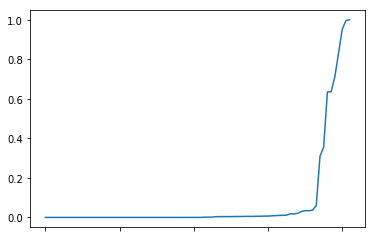

In [4]:
import matplotlib.pyplot as plt
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values())
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [3]:
# Delete columns, where all the entries are 0.
df = df.loc[:, (df != 0).any(axis=0)]
print(df.shape)
df.info()

(8921483, 83)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    object
ProductName                                          object
EngineVersion                                        object
AppVersion                                           object
AvSigVersion                                         object
IsBeta                                               int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                     int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                               int64
CountryIdentifier                                    int64
CityIdentifier                  

In [2]:
file = 'data/train.csv'
df = pd.read_csv(file)

/data/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math